# Run the whole deltas algorithm

In [36]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample, non_sep
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [37]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes',
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2',
            12: 'Direct Marketing', 13: 'Habermans breast cancer',
            14: 'Wisconsin Breast Cancer', 15: 'Hepatitis',
            16: 'Heart Disease'}

dataset = datasets[16]  # change ind to select dataset to use
model = 'SVM-rbf'
data_clf = data.get_real_dataset(dataset, _print=False, seed=1, scale=True)

## Get Classifier

Baseline


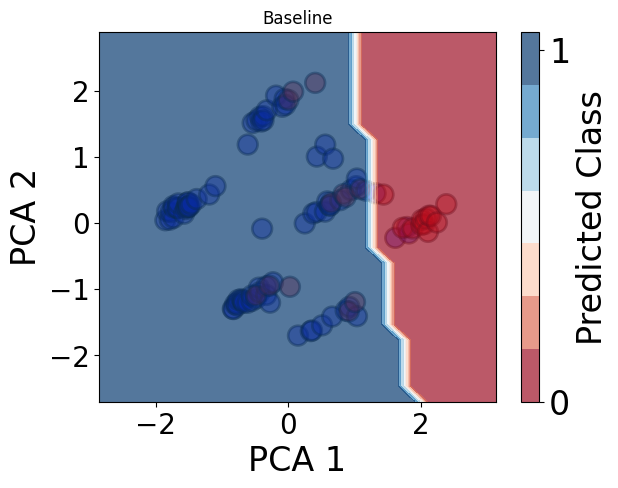

In [38]:
classifiers_dict = classifier.get_classifier(
    data_clf=data_clf,
    model=model,
    balance_clf=False,
    balanced_weights=False,
    smote=False,
    costcla_methods=False,  

    )
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas - downsample

Original Data
plotting training data as data input


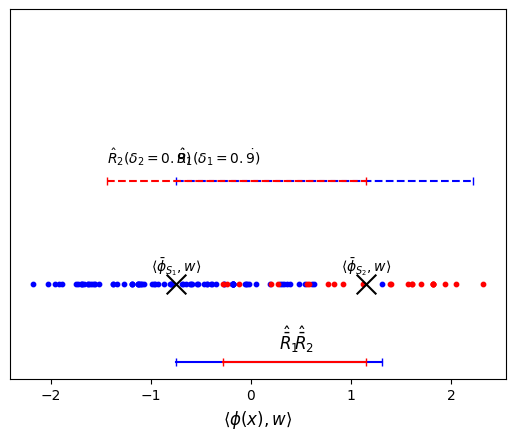

Unable to find result with downsample, increase the max_trials


In [39]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_slacks = downsample.downsample_deltas(
    data_clf['clf']).fit(X, y, _print=True, _plot=True, max_trials=1000, grid_search=True)

## Fit deltas - non sep loss version

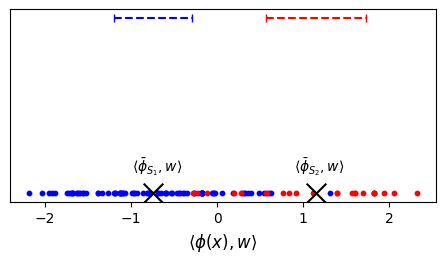

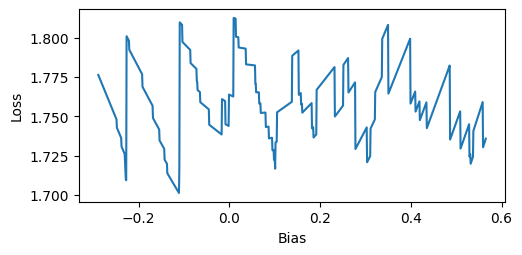

In [50]:

X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas = non_sep.deltas(
    clf).fit(X, y, _plot=True)

# Evaluation on test data

In [56]:
classifiers_dict['Deltas slacks'] = deltas_slacks
classifiers_dict['Deltas'] = deltas
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=False)

Not fit to any data yet, call 'fit(X, y)' or  method first
               Accuracy    G-Mean        F1
Method                                     
Baseline       0.896226  0.780869  0.731707
Deltas slacks  0.896226  0.780869  0.731707
Deltas         0.867925  0.884602  0.758621 




,Accuracy,G-Mean,F1
Method,,,
Baseline,0.896226,0.780869,0.731707
Deltas slacks,0.896226,0.780869,0.731707
Deltas,0.867925,0.884602,0.758621
